# WeatherPy
* As you get closer to 0 latitude temperature Rises. 
* Cloudiness increases at the high end of latitude.
* High levels of wind speed occurs at the high end of latitude.

In [101]:
% matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import requests
import json
from Config import api_key
from citipy import citipy
import csv

lat_range =(-90,90)
lng_range = (-180, 180)

In [102]:
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={units}&q="

In [103]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [135]:
responses = []
lat = []
lon = []
temp = []
humidity = []
wind_speed = []
clouds = []
city_name = []

In [136]:
for city in cities:
    response  = requests.get(query_url + city).json()
    try:
        city_name.append(response["name"])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response["wind"]["speed"])
    except KeyError:
        continue
    


In [150]:
weather_data = pd.DataFrame({"City": city_name, "Latitude": lat, "Longitude": lon, "Temperature": temp, "Humidity (%)": humidity,"Cloudiness (%)": clouds, "Wind Speed (mph)": wind_speed})

In [164]:
weather_data.to_csv("weather_data.csv", encoding="utf-8")

<IPython.core.display.Javascript object>


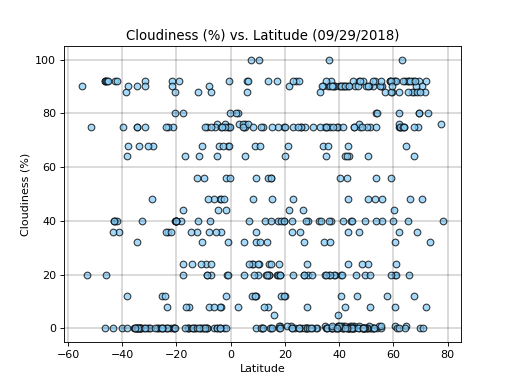

In [167]:
scattter_clouds = plt.scatter(weather_data['Latitude'], weather_data["Cloudiness (%)"], c="lightskyblue", alpha=0.75, edgecolor="black" )
plt.grid(color="black", linestyle="-", linewidth=0.25,)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude (09/29/2018)")
plt.savefig("Cloudiness_vs._Latitude.png")

In [168]:
plt.close()

<IPython.core.display.Javascript object>


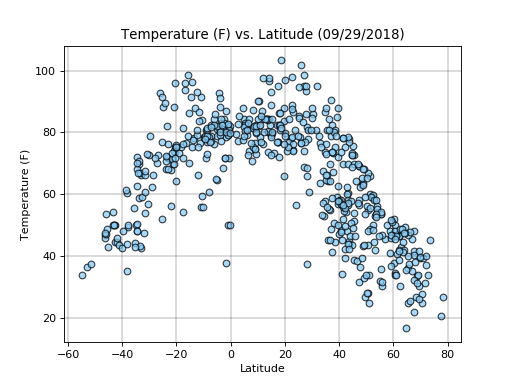

In [169]:
scattter_temp = plt.scatter(weather_data['Latitude'], weather_data["Temperature"], c="lightskyblue", alpha=0.75, edgecolor="black" )
plt.grid(color="black", linestyle="-", linewidth=0.25,)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude (09/29/2018)")
plt.savefig("Temperature_vs._Latitude_.png")

In [170]:
plt.close()

<IPython.core.display.Javascript object>


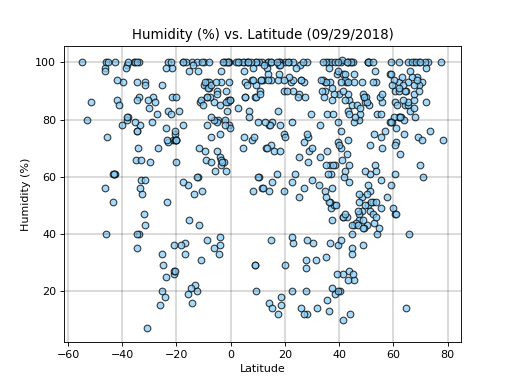

In [171]:
scattter_humidity = plt.scatter(weather_data['Latitude'], weather_data["Humidity (%)"], c="lightskyblue", alpha=0.75, edgecolor="black" )
plt.grid(color="black", linestyle="-", linewidth=0.25,)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude (09/29/2018)")
plt.savefig("Humidity_vs._Latitude_.png")

In [172]:
plt.close()

<IPython.core.display.Javascript object>


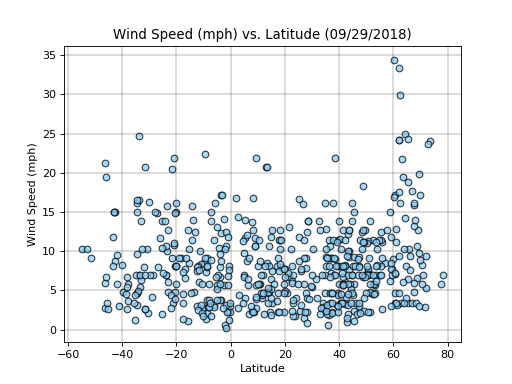

In [173]:
scattter_wind_speed = plt.scatter(weather_data['Latitude'], weather_data["Wind Speed (mph)"], c="lightskyblue", alpha=0.75, edgecolor="black" )
plt.grid(color="black", linestyle="-", linewidth=0.25,)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude (09/29/2018)")
plt.savefig("Wind Speed_vs._Latitude_.png")

In [174]:
plt.close()